In [ ]:
# Data Loading

In [ ]:
!pip install -Uqq fastbook

In [2]:

import fastbook
fastbook.setup_book()
from fastbook import *

In [ ]:
import os

In [ ]:
!pip install kaggle
# go to kaggle and install your unique api key - move this into the location

In [ ]:
if 'apparel-dataset' not in os.listdir():
    if 'apparel-dataset.zip' not in os.listdir():
        print('Dataset has not been downloaded. Downloading now from kaggle')
        !kaggle datasets download -d kaiska/apparel-dataset
    # unzip
    !mkdir apparel-dataset
    !unzip apparel-dataset.zip -d ./apparel-dataset
# move dataset into the correct location
else:
    print("Dataset already loaded")

In [ ]:
# Data Blocks

In [ ]:
path = Path('apparel-dataset')

In [ ]:
fns = get_image_files(path)
fns

In [ ]:
failed = verify_images(fns)
failed.map(Path.unlink);
failed

In [ ]:
# Old datablock
clothes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(460, min_scale=0.5),
    batch_tfms=aug_transforms(size=224, min_scale=0.7))


In [22]:
os.listdir()

['apparel-dataset',
 'Model_training.ipynb',
 'prediction_evaluation.ipynb',
 'multi_labels.csv',
 '.git',
 'multilabel_subset.csv',
 '.ipynb_checkpoints',
 '.gitignore',
 'export.pkl',
 'data_exploration.ipynb',
 'apparel-dataset.zip']

In [36]:

# New datablock
# Image Block and Category Block
#filename = 'multilabel_subset.csv'
filename = 'multi_labels.csv'
multilables = pd.read_csv(filename)

# Turning it into a multilabel data block
path = Path('.')
def get_x(r): return path/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), 
                   get_x = get_x, 
                   get_y = get_y, 
                  item_tfms=RandomResizedCrop(460, min_scale=0.5),
                   batch_tfms=aug_transforms(size=224, min_scale=0.7))
dsets = dblock.datasets(multilables)

In [29]:
dsets.train[0]

(PILImage mode=RGB size=256x256,
 TensorMultiCategory([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [37]:
dls = dblock.dataloaders(multilables)

In [38]:
dls = dblock.dataloaders(multilables)
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2)).to_fp16()
learn.fine_tune(20)


epoch,train_loss,valid_loss,accuracy_multi,time


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 202, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/load.py", line 118, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/basics.py", line 216, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/load.py", line 133, in do_item
    try: return self.after_item(self.create_item(s))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/load.py", line 140, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 333, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 333, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 299, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 261, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 200, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/dispatch.py", line 118, in __call__
    return f(*args, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/PIL/Image.py", line 2912, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/clothing_classification/apparel-dataset/blue_shorts/196.jpg'


In [35]:
learner_name = "multi_label_model_subset.pkl"
learn.export(learner_name)

,target,predicted,probabilities,loss
0,shoes;white,pants;shorts;white,"tensor([0.0601, 0.2705, 0.3557, 0.0909, 0.1103, 0.1477, 0.9912, 0.3130, 0.0385, 0.2230, 0.0116, 0.5040, 0.1870, 0.1242, 0.0656, 0.9117, 0.1419])",0.7293248176574707
1,green;pants,blue;green;pants;red,"tensor([0.0255, 0.9998, 0.4068, 0.3943, 0.8173, 0.0281, 0.9999, 0.1397, 0.5977, 0.0717, 0.0195, 0.0671, 0.1122, 0.0754, 0.0854, 0.0302, 0.1134])",0.6831867098808289
2,pants;pink,dress;pants;pink;skirt;white;yellow,"tensor([0.1882, 0.1254, 0.1808, 0.9422, 0.0309, 0.1082, 0.7154, 0.9843, 0.4067, 0.1490, 0.0080, 0.1025, 0.1653, 0.7259, 0.1443, 0.8367, 0.8626])",0.595083475112915
3,pink;skirt,dress;pink;skirt;white,"tensor([0.0232, 0.2846, 0.2787, 0.9915, 0.0189, 0.3368, 0.1420, 0.8151, 0.2581, 0.0700, 0.0106, 0.0652, 0.1376, 0.6302, 0.1461, 0.8364, 0.4828])",0.583862841129303
4,pants;pink,hoodie;pants;pink;red;shorts,"tensor([0.2225, 0.2649, 0.1754, 0.2493, 0.0666, 0.5322, 0.6160, 0.7385, 0.9751, 0.1306, 0.0368, 0.9201, 0.1162, 0.1569, 0.0943, 0.0429, 0.1979])",0.5711877942085266
5,blue;shorts,blue;green;shorts;white,"tensor([0.0373, 0.9910, 0.1234, 0.1944, 0.9972, 0.4959, 0.0839, 0.3879, 0.0139, 0.0719, 0.0011, 1.0000, 0.1397, 0.1672, 0.0472, 0.5378, 0.0802])",0.5213446021080017
6,skirt;yellow,brown;shorts;white;yellow,"tensor([0.1509, 0.4387, 0.5149, 0.4356, 0.1597, 0.1573, 0.0386, 0.1829, 0.0277, 0.0782, 0.0760, 0.7934, 0.0880, 0.1931, 0.3132, 0.9014, 0.9916])",0.5191701054573059
7,green;shorts,green;pink;shirt;shorts,"tensor([0.3897, 0.2353, 0.2550, 0.1259, 0.9989, 0.2589, 0.1034, 0.5469, 0.3577, 0.9550, 0.0338, 0.9891, 0.4422, 0.2299, 0.4389, 0.1784, 0.1595])",0.4573074281215668
8,suit;white,black;brown;dress;hoodie;suit;white,"tensor([0.8242, 0.1292, 0.5808, 0.5524, 0.0542, 0.7720, 0.0863, 0.4047, 0.0991, 0.2420, 0.0242, 0.0620, 0.3576, 0.3930, 0.8064, 0.8700, 0.1939])",0.45144522190093994
9,hoodie;red,hoodie;pants;pink;red;suit,"tensor([0.1235, 0.0952, 0.4464, 0.0283, 0.3650, 0.9817, 0.6645, 0.8013, 0.9859, 0.4414, 0.2730, 0.0784, 0.2494, 0.1871, 0.5216, 0.1954, 0.1746])",0.39238086342811584


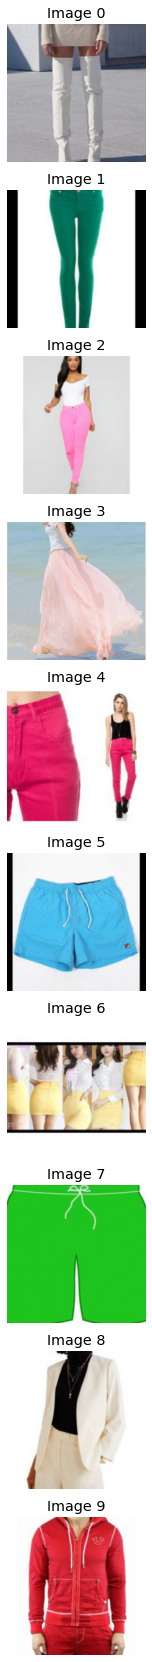

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10, nrows=10)

In [ ]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'multilabel.pkl')

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
show_image(fns[0])

In [ ]:
fns = get_image_files(path)

In [ ]:
from fastai.vision import *

In [ ]:
failed = []
preds = []
for i in range(1000):
    pred = learn_inf.predict(fns[i])
    actual = parent_label(fns[i])
    if pred[0] != actual:
        failed.append(fns[i])
        preds.append(pred)
        #Image.open(fns[0])


In [ ]:
print(len(preds))
for i in range(len(preds)):
    print(preds[i][0])
    Image.open(failed[i])

In [ ]:
from PIL import Image